In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
dt = pd.read_csv(r"C:\Users\shrad\Downloads\my_movies.csv")
dt

V1             V2             V3          V4     V5  ...  LOTR2  Harry Potter2  LOTR  Braveheart  Green Mile
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2  ...      1              0     0           0           1
1      Gladiator        Patriot     Braveheart         NaN    NaN  ...      0              0     0           1           0
2          LOTR1          LOTR2            NaN         NaN    NaN  ...      1              0     0           0           0
3      Gladiator        Patriot    Sixth Sense         NaN    NaN  ...      0              0     0           0           0
4      Gladiator        Patriot    Sixth Sense         NaN    NaN  ...      0              0     0           0           0
5      Gladiator        Patriot    Sixth Sense         NaN    NaN  ...      0              0     0           0           0
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN  ...      0              1     0           0           0
7      Gladiator        Patriot            NaN         NaN    NaN  ...      0              0     0           0           0
8      Gladiator        Patriot    Sixth Sense         NaN    NaN  ...      0              0     0           0           0
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN  ...      0              0     1           0           1

[10 rows x 15 columns]

In [4]:
dt.shape

(10, 15)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
dt.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
dt2 = dt.iloc[:,5:]
dt2

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  Braveheart  Green Mile
0            1          0      1              1        0      1              0     0           0           1
1            0          1      0              0        1      0              0     0           1           0
2            0          0      1              0        0      1              0     0           0           0
3            1          1      0              0        1      0              0     0           0           0
4            1          1      0              0        1      0              0     0           0           0
5            1          1      0              0        1      0              0     0           0           0
6            0          0      0              1        0      0              1     0           0           0
7            0          1      0              0        1      0              0     0           0           0
8            1          1      0              0        1      0              0     0           0           0
9            1          1      0              0        0      0              0     1           0           1

In [8]:
dt2.describe()

Sixth Sense  Gladiator      LOTR1  Harry Potter1  ...  Harry Potter2       LOTR  Braveheart  Green Mile
count    10.000000  10.000000  10.000000      10.000000  ...      10.000000  10.000000   10.000000   10.000000
mean      0.600000   0.700000   0.200000       0.200000  ...       0.100000   0.100000    0.100000    0.200000
std       0.516398   0.483046   0.421637       0.421637  ...       0.316228   0.316228    0.316228    0.421637
min       0.000000   0.000000   0.000000       0.000000  ...       0.000000   0.000000    0.000000    0.000000
25%       0.000000   0.250000   0.000000       0.000000  ...       0.000000   0.000000    0.000000    0.000000
50%       1.000000   1.000000   0.000000       0.000000  ...       0.000000   0.000000    0.000000    0.000000
75%       1.000000   1.000000   0.000000       0.000000  ...       0.000000   0.000000    0.000000    0.000000
max       1.000000   1.000000   1.000000       1.000000  ...       1.000000   1.000000    1.000000    1.000000

[8 rows x 10 columns]

In [9]:
# Apriori Algorithum
## 1. Association rules with 10% support and 70% confidence
itemsets = apriori(dt2,min_support=0.1,use_colnames=True)
itemsets

C:\Users\shrad\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Patriot, Gladiator, Sixth Sense)
31      0.1                     (LOTR, Gladiator, Sixth Sense)
32      0.1               (Gladiator, Green Mile, Sixth Sense)
33      0.1                (Harry Potter1, LOTR1, Sixth Sense)
34      0.1                        (LOTR2, LOTR1, Sixth Sense)
35      0.1                   (LOTR1, Green Mile, Sixth Sense)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Harry Potter1, Green Mile, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (LOTR, Green Mile, Sixth Sense)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Gladiator, Green Mile, LOTR)
42      0.1                      (LOTR2, Harry Potter1, LOTR1)
43      0.1                 (LOTR1, Harry Potter1, Green Mile)
44      0.1                         (LOTR1, LOTR2, Green Mile)
45      0.1                 (LOTR2, Harry Potter1, Green Mile)
46      0.1         (LOTR, Gladiator, Green Mile, Sixth Sense)
47      0.1         (LOTR2, Harry Potter1, LOTR1, Sixth Sense)
48      0.1    (LOTR1, Harry Potter1, Green Mile, Sixth Sense)
49      0.1            (LOTR1, LOTR2, Green Mile, Sixth Sense)
50      0.1    (LOTR2, Harry Potter1, Green Mile, Sixth Sense)
51      0.1          (LOTR1, Harry Potter1, Green Mile, LOTR2)
52      0.1  (LOTR2, Sixth Sense, Harry Potter1, LOTR1, Gre...

In [10]:
rule= association_rules(itemsets,metric='lift',min_threshold=0.7)
rule

antecedents                                      consequents  ...  leverage  conviction
0        (Gladiator)                                    (Sixth Sense)  ...      0.08        1.40
1      (Sixth Sense)                                      (Gladiator)  ...      0.08        1.80
2            (LOTR1)                                    (Sixth Sense)  ...     -0.02        0.80
3      (Sixth Sense)                                          (LOTR1)  ...     -0.02        0.96
4    (Harry Potter1)                                    (Sixth Sense)  ...     -0.02        0.80
..               ...                                              ...  ...       ...         ...
245          (LOTR2)  (Harry Potter1, LOTR1, Green Mile, Sixth Sense)  ...      0.08        1.80
246    (Sixth Sense)        (LOTR2, Harry Potter1, LOTR1, Green Mile)  ...      0.04        1.08
247  (Harry Potter1)          (LOTR2, LOTR1, Green Mile, Sixth Sense)  ...      0.08        1.80
248          (LOTR1)  (LOTR2, Harry Potter1, Green Mile, Sixth Sense)  ...      0.08        1.80
249     (Green Mile)       (LOTR2, Harry Potter1, LOTR1, Sixth Sense)  ...      0.08        1.80

[250 rows x 9 columns]

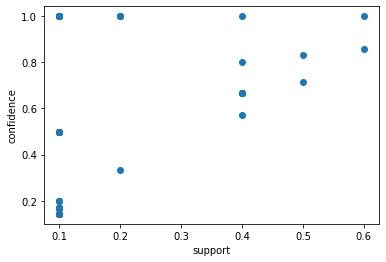

In [11]:
# visualization of obtained rule
plt.scatter(rule['support'],rule['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [12]:
#Association rules with 5% support and 90% confidence
itemsets1 = apriori(dt2,min_support=0.05,use_colnames=True)
itemsets1

C:\Users\shrad\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Patriot, Gladiator, Sixth Sense)
31      0.1                     (LOTR, Gladiator, Sixth Sense)
32      0.1               (Gladiator, Green Mile, Sixth Sense)
33      0.1                (Harry Potter1, LOTR1, Sixth Sense)
34      0.1                        (LOTR2, LOTR1, Sixth Sense)
35      0.1                   (LOTR1, Green Mile, Sixth Sense)
36      0.1                (LOTR2, Harry Potter1, Sixth Sense)
37      0.1           (Harry Potter1, Green Mile, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (LOTR, Green Mile, Sixth Sense)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Gladiator, Green Mile, LOTR)
42      0.1                      (LOTR2, Harry Potter1, LOTR1)
43      0.1                 (LOTR1, Harry Potter1, Green Mile)
44      0.1                         (LOTR1, LOTR2, Green Mile)
45      0.1                 (LOTR2, Harry Potter1, Green Mile)
46      0.1         (LOTR, Gladiator, Green Mile, Sixth Sense)
47      0.1         (LOTR2, Harry Potter1, LOTR1, Sixth Sense)
48      0.1    (LOTR1, Harry Potter1, Green Mile, Sixth Sense)
49      0.1            (LOTR1, LOTR2, Green Mile, Sixth Sense)
50      0.1    (LOTR2, Harry Potter1, Green Mile, Sixth Sense)
51      0.1          (LOTR1, Harry Potter1, Green Mile, LOTR2)
52      0.1  (LOTR2, Sixth Sense, Harry Potter1, LOTR1, Gre...

In [13]:
rule1 = association_rules(itemsets,metric='lift',min_threshold=0.9)
rule1

antecedents                                      consequents  ...  leverage  conviction
0        (Gladiator)                                    (Sixth Sense)  ...      0.08        1.40
1      (Sixth Sense)                                      (Gladiator)  ...      0.08        1.80
2          (Patriot)                                    (Sixth Sense)  ...      0.04        1.20
3      (Sixth Sense)                                        (Patriot)  ...      0.04        1.20
4             (LOTR)                                    (Sixth Sense)  ...      0.04         inf
..               ...                                              ...  ...       ...         ...
233          (LOTR2)  (Harry Potter1, LOTR1, Green Mile, Sixth Sense)  ...      0.08        1.80
234    (Sixth Sense)        (LOTR2, Harry Potter1, LOTR1, Green Mile)  ...      0.04        1.08
235  (Harry Potter1)          (LOTR2, LOTR1, Green Mile, Sixth Sense)  ...      0.08        1.80
236          (LOTR1)  (LOTR2, Harry Potter1, Green Mile, Sixth Sense)  ...      0.08        1.80
237     (Green Mile)       (LOTR2, Harry Potter1, LOTR1, Sixth Sense)  ...      0.08        1.80

[238 rows x 9 columns]